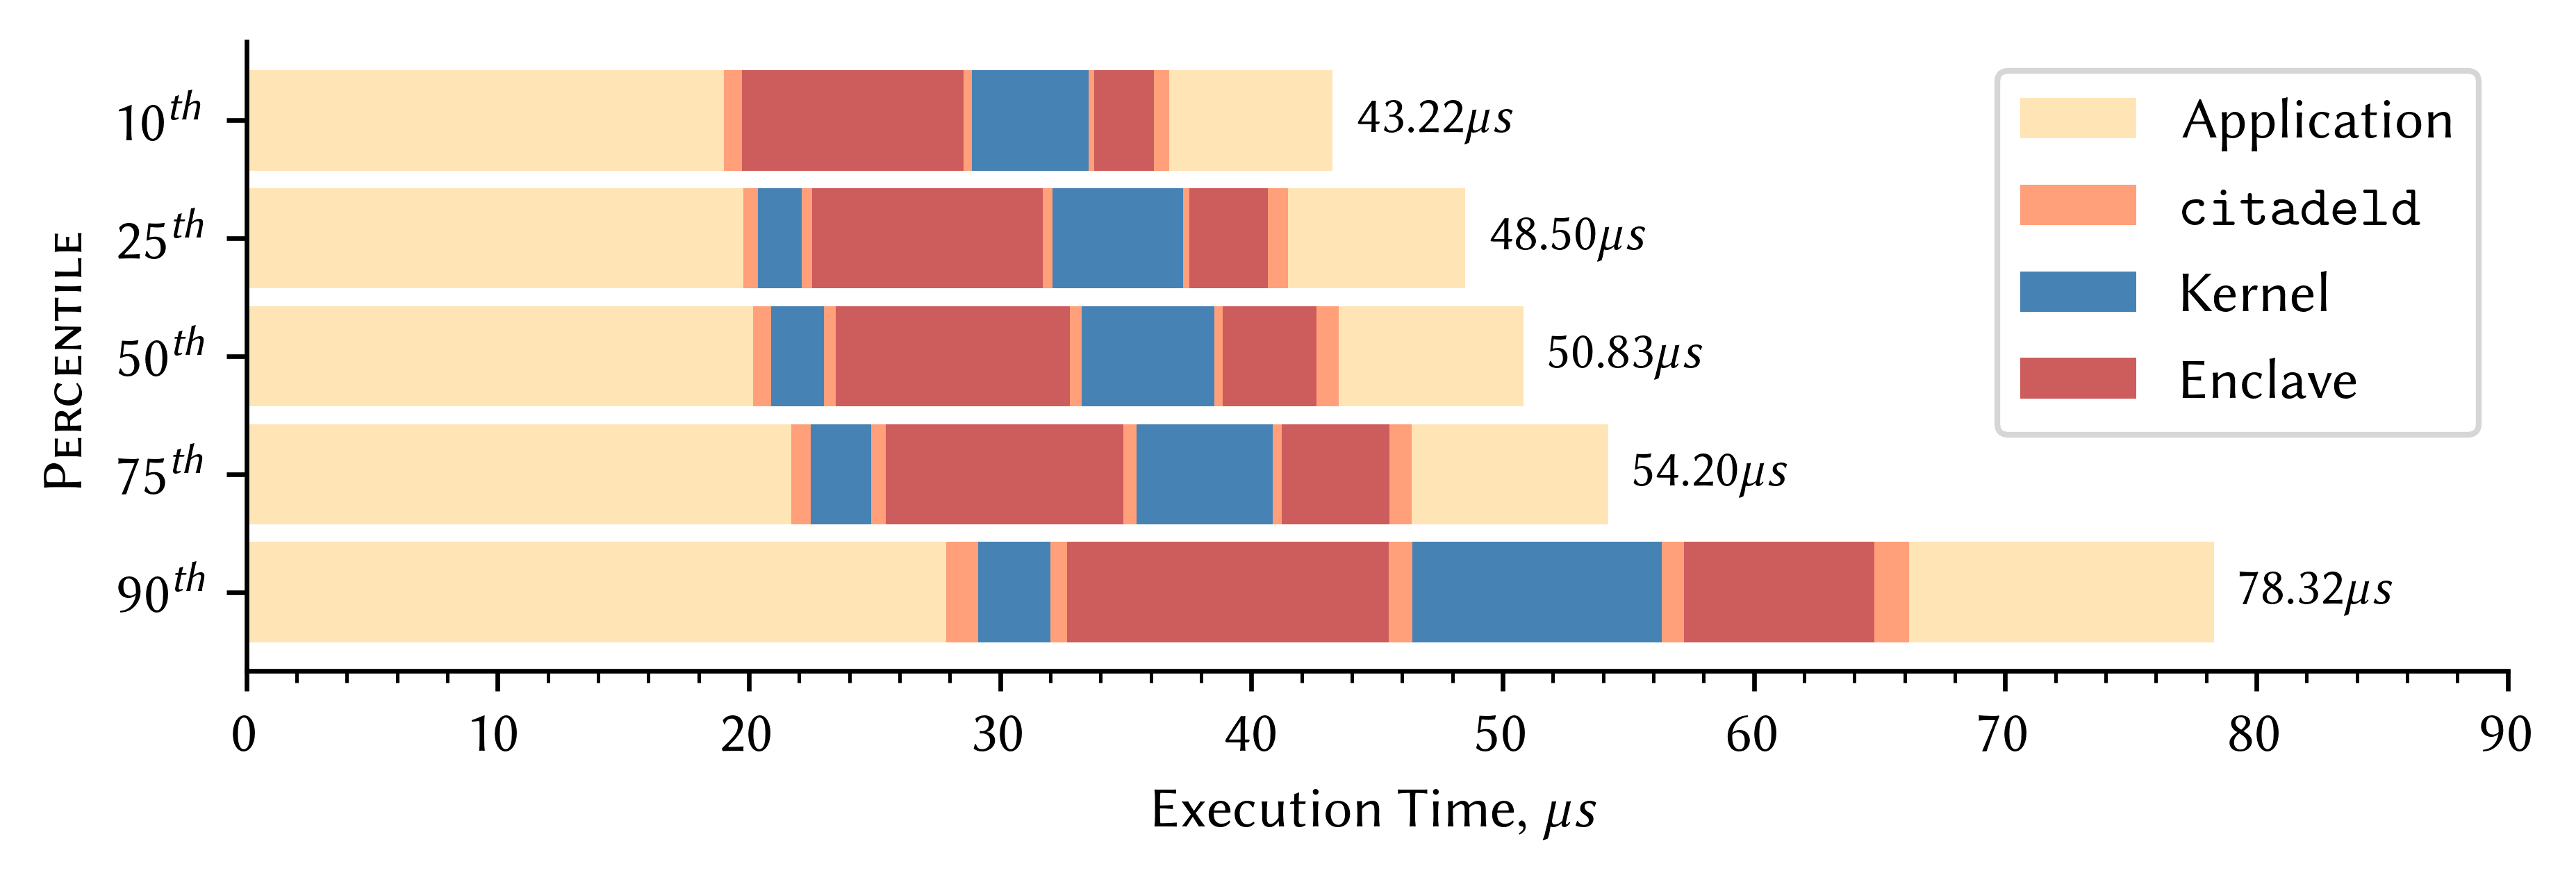

In [173]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 600
mpl.rcParams['figure.figsize'] = 7,2
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage[tt=false]{libertine}\usepackage[libertine]{newtxmath}\usepackage{sfmath}\usepackage[T1]{fontenc}\usepackage{amsmath}'

rc('font', weight='bold')
 
# Data.
# Manually transcribed (painstakingly).
# Values in us, n=100.
app_1 =      [19.006, 19.780, 20.180, 21.680, 27.855]
citadeld_1 = [ 0.517,  0.596,  0.696,  0.796,  1.283]
kernel_1 =   [ 0.000,  1.741,  2.122,  2.403,  2.861]
citadeld_2 = [ 0.192,  0.402,  0.475,  0.581,  0.660]
enclave_1 =  [ 8.826,  9.170,  9.297,  9.458, 12.812]
citadeld_3 = [ 0.341,  0.406,  0.465,  0.513,  0.951]
kernel_2 =   [ 4.643,  5.199,  5.301,  5.428,  9.909]
citadeld_4 = [ 0.216,  0.249,  0.318,  0.357,  0.883]
enclave_2 =  [ 2.388,  3.127,  3.750,  4.281,  7.585]
citadeld_5 = [ 0.616,  0.794,  0.885,  0.898,  1.383]
app_2 =      [ 6.477,  7.041,  7.345,  7.803, 12.142]

order = [app_1, citadeld_1, kernel_1, citadeld_2, enclave_1, citadeld_3, kernel_2, citadeld_4, enclave_2, citadeld_5, app_2]
types = ["a",   "c",        "k",      "c",        "e",       "c",        "k",      "c",        "e",       "c",        "a"]
colors = {
    "e": "indianred",
    "a": "moccasin", #"cornflowerblue",
    "k": "steelblue", #"lightcoral",
    "c": "lightsalmon"
}
key_to_label = {
    "a": "Application",
    "c": "$\\texttt{citadeld}$",
    "k": "Kernel", 
    "e": "Enclave"
}
legend_seen = []

# The position of the bars on the x-axis
r = [4,3,2,1,0]
 
names = ['$10^{th}$', '$25^{th}$', '$50^{th}$', '$75^{th}$', '$90^{th}$']
 
fig, ax = plt.subplots()
base_to_date = [0 for _ in names]
for i in range(len(order)):
    label = "" if (types[i] in legend_seen) else key_to_label[types[i]]
    plt.barh(r, order[i], left=base_to_date, color=colors[types[i]], edgecolor='white', linewidth=0, height=0.85, label=label)
    base_to_date = np.add(base_to_date, order[i]).tolist()
    legend_seen.append(types[i])
    

plt.yticks(r, names, fontweight='bold')
plt.ylabel("$\\textsc{Percentile}$")
plt.xlabel("Execution Time, $\mu s$")

ax.minorticks_on()
ax.tick_params(axis='x', which='minor', direction='out')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 
for i, value in enumerate(base_to_date):
    ax.text(value + 1, len(base_to_date)-i-1, "${:.2f}\mu s$".format(value), fontsize=9, va='center', color='black')

ax.set_xlim(right=90)
ax.legend()
plt.savefig("open-anatomy.pdf")
plt.show()

In [219]:
native_times = [56,94,99,71,55,49,42,84,38,55]
native_bws = [183.1,109,101.3,144,186.7,208,243,121,270,185]
# for i in range(len(taint_times)):
#     print(native_times[i] * native_bws[i])
print(np.mean(native_times), np.std(native_times))
print(np.mean(native_bws)*8, np.std(native_bws)*8)

64.3 20.45507272047694
1400.88 428.6168937407857


In [220]:
notaint_times = [71,75,49,40,101,79,71,66,37,48]
notaint_bws = [144,136,209,254,102,130,145,155,277,212]
print(len(notaint_times), "=", len(notaint_bws))

# for i in range(len(taint_times)):
#     print(notaint_times[i] * notaint_bws[i])
print(np.mean(notaint_times), np.std(notaint_times))
print(np.mean(notaint_bws)*8, np.std(notaint_bws)*8)

10 = 10
63.7 18.97919914011126
1411.2 440.2646476836404


In [222]:
taint_times = [35,41,67,99,95,62,37,81,50,93]
taint_bws = [293,250,152,103,106.5,164,273,125,201,109]
print(len(taint_times), "=", len(taint_bws))
# for i in range(len(taint_times)):
#     print(taint_times[i] * taint_bws[i])
print(np.mean(taint_times), np.std(taint_times))
print(np.mean(taint_bws)*8, np.std(taint_bws)*8)

10 = 10
66.0 23.630488780387086
1421.2 549.274576145665
